<a href="https://www.kaggle.com/code/oussamaelkhsoui/titanic?scriptVersionId=118308294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [26]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

In [27]:
titanic_test = pd.read_csv("/kaggle/input/titanic-dataset/tested.csv")
titanic_train = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
print(f'sex:\n{titanic_train["Sex"].value_counts()}')
print(f'Ticket:\n{titanic_train["Ticket"].value_counts()}')
print(f'Cabin        :\n{titanic_train["Cabin"].value_counts()}')
print(f'Embarked     :\n{titanic_train["Embarked"].value_counts()}')

sex:
male      577
female    314
Name: Sex, dtype: int64
Ticket:
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
Cabin        :
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
Embarked     :
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [30]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
titanic_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


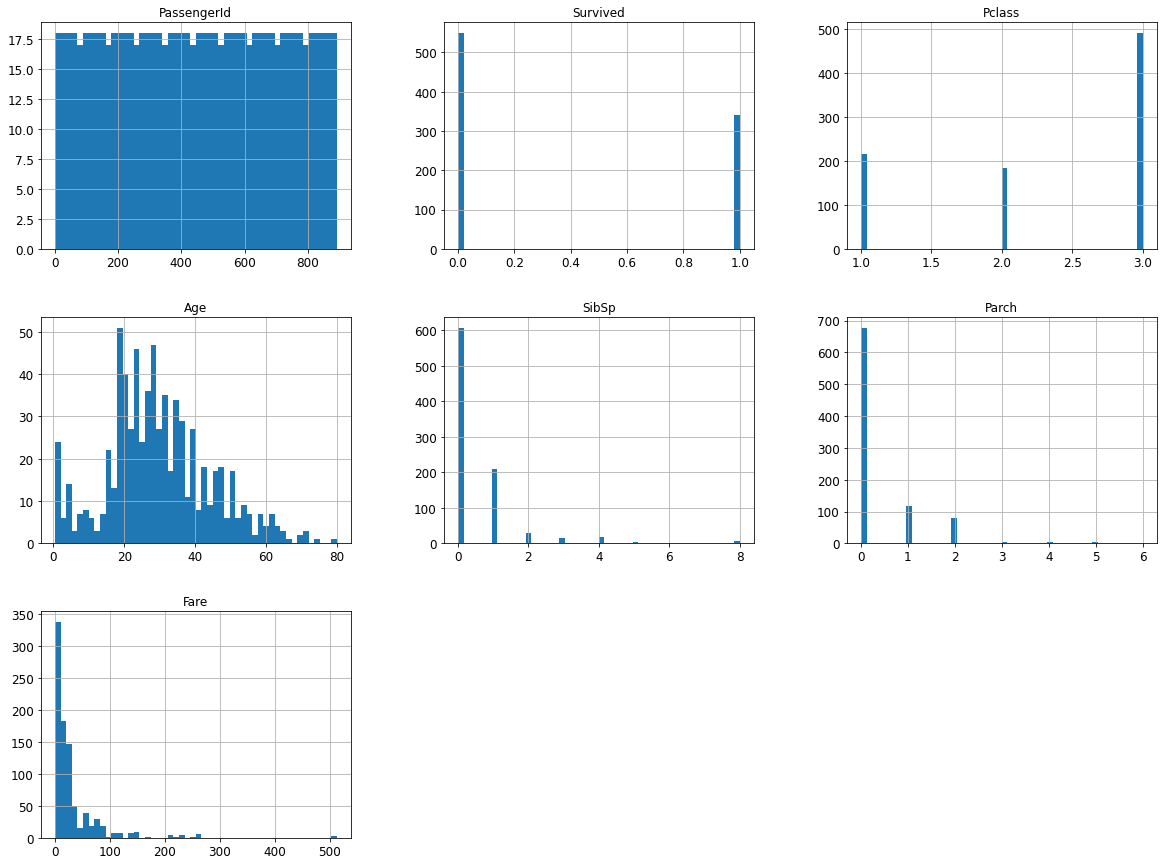

In [32]:
import matplotlib.pyplot as plt
titanic_train.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [37]:
titanic_train_copy = titanic_train.copy()
titanic_train_copy["NSex"] = titanic_train_copy["Sex"]
titanic_train_copy.NSex[titanic_train_copy.NSex == "male"] = 1
titanic_train_copy.NSex[titanic_train_copy.NSex == "female"] = 0
titanic_train_copy.NSex = titanic_train_copy.NSex.astype(np.uint8)

titanic_test_copy = titanic_test.copy()
titanic_test_copy["NSex"] = titanic_test_copy["Sex"]
titanic_test_copy.NSex[titanic_test_copy.NSex == "male"] = 1
titanic_test_copy.NSex[titanic_test_copy.NSex == "female"] = 0
titanic_test_copy.NSex = titanic_test_copy.NSex.astype(np.uint8)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

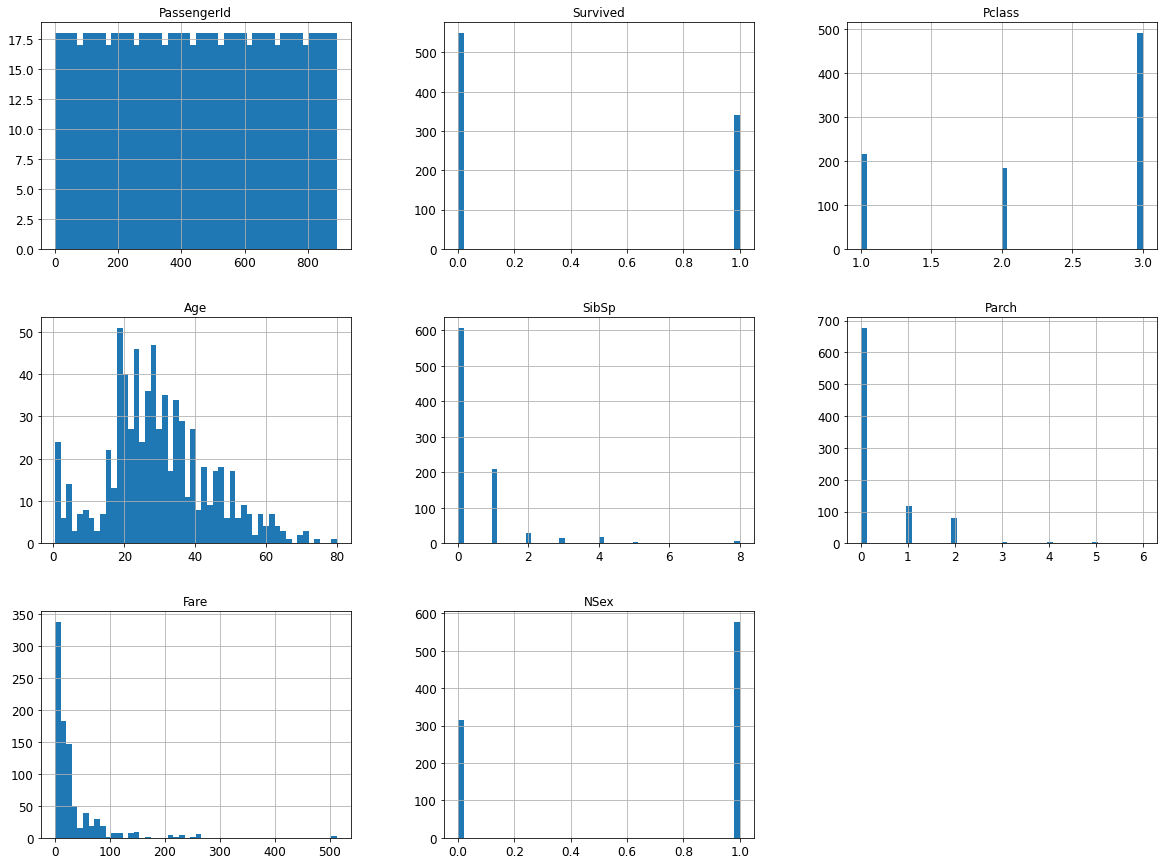

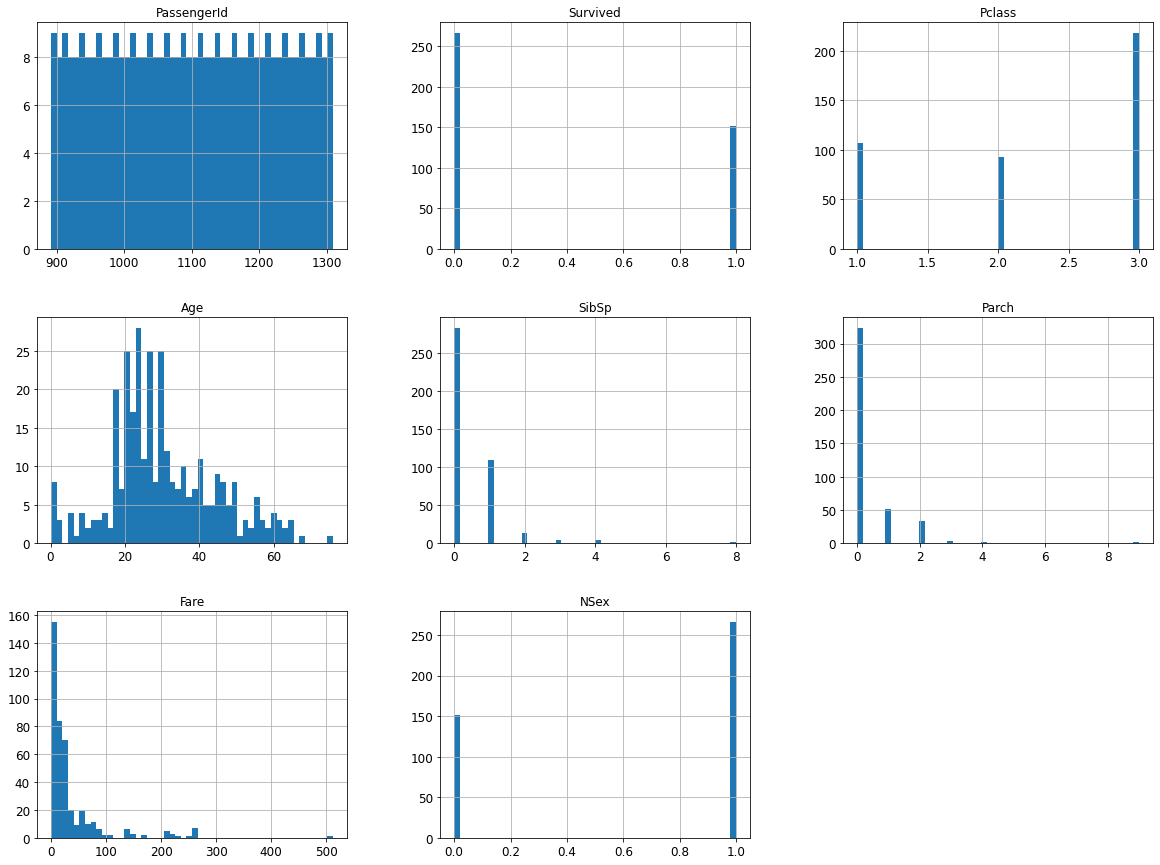

In [34]:
for set_ in (titanic_train_copy, titanic_test_copy):
    set_.hist(bins=50, figsize=(20,15))
    # save_fig("attribute_histogram_plots")
    plt.show()

In [38]:
for set_ in (titanic_train_copy, titanic_test_copy):
    set_.drop("PassengerId", axis=1, inplace=True)
    set_.drop("Sex", axis=1, inplace=True)
titanic_train_copy

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NSex
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


In [66]:
whole_data = pd.concat([titanic_train_copy, titanic_test_copy], ignore_index=True)
# whole_data
def att_propotions(attribute : str, data) -> pd.Series:
    return  data[attribute].value_counts()/ len(data)

In [67]:
whole_data["Pclass"].value_counts()/ len(whole_data)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(whole_data, test_size=0.2, random_state=42)

comper_props_Pclass = pd.DataFrame({
    "overAll": att_propotions("Pclass", whole_data),
    "OurSplit": att_propotions("Pclass", titanic_test_copy),
    "Random": att_propotions("Pclass", test_set),
}).sort_index()
comper_props_Pclass

,overAll,OurSplit,Random
1,0.246753,0.255981,0.209924
2,0.211612,0.222488,0.225191
3,0.541635,0.521531,0.564885


In [70]:
comper_props_Sibsp = pd.DataFrame({
    "overAll": att_propotions("SibSp", whole_data),
    "OurSplit": att_propotions("SibSp", titanic_test_copy),
    "Random": att_propotions("SibSp", test_set),
}).sort_index()
comper_props_Sibsp

,overAll,OurSplit,Random
0,0.680672,0.677033,0.740458
1,0.243697,0.263158,0.198473
2,0.032086,0.033493,0.022901
3,0.015279,0.009569,0.019084
4,0.016807,0.009569,0.015267
5,0.004584,0.002392,NaN
8,0.006875,0.004785,0.003817


In [71]:
comper_props_Parch = pd.DataFrame({
    "overAll": att_propotions("Parch", whole_data),
    "OurSplit": att_propotions("Parch", titanic_test_copy),
    "Random": att_propotions("Parch", test_set),
}).sort_index()
comper_props_Parch

,overAll,OurSplit,Random
0,0.765470,0.775120,0.744275
1,0.129870,0.124402,0.122137
2,0.086325,0.078947,0.106870
3,0.006112,0.007177,0.015267
4,0.004584,0.004785,0.007634
5,0.004584,0.002392,0.003817
6,0.001528,0.002392,NaN
9,0.001528,0.004785,NaN


In [72]:
comper_props_NSex = pd.DataFrame({
    "overAll": att_propotions("NSex", whole_data),
    "OurSplit": att_propotions("NSex", titanic_test_copy),
    "Random": att_propotions("NSex", test_set),
}).sort_index()
comper_props_NSex

,overAll,OurSplit,Random
0,0.355997,0.363636,0.370229
1,0.644003,0.636364,0.629771


In [73]:
comper_props_Survived = pd.DataFrame({
    "overAll": att_propotions("Survived", whole_data),
    "OurSplit": att_propotions("Survived", titanic_test_copy),
    "Random": att_propotions("Survived", test_set),
}).sort_index()
comper_props_Survived

,overAll,OurSplit,Random
0,0.622613,0.636364,0.60687
1,0.377387,0.363636,0.39313


# proposition:
The propotion of poeple who sevived is proportionate to the women and the propotion of poeple who does not sevived is proportionate to the men.
So les's suppose that NSex is a very important attribute to predict the survival. we may want to ensure that the test set is representative of the various of Sex in the whole dataset 

<AxesSubplot:>

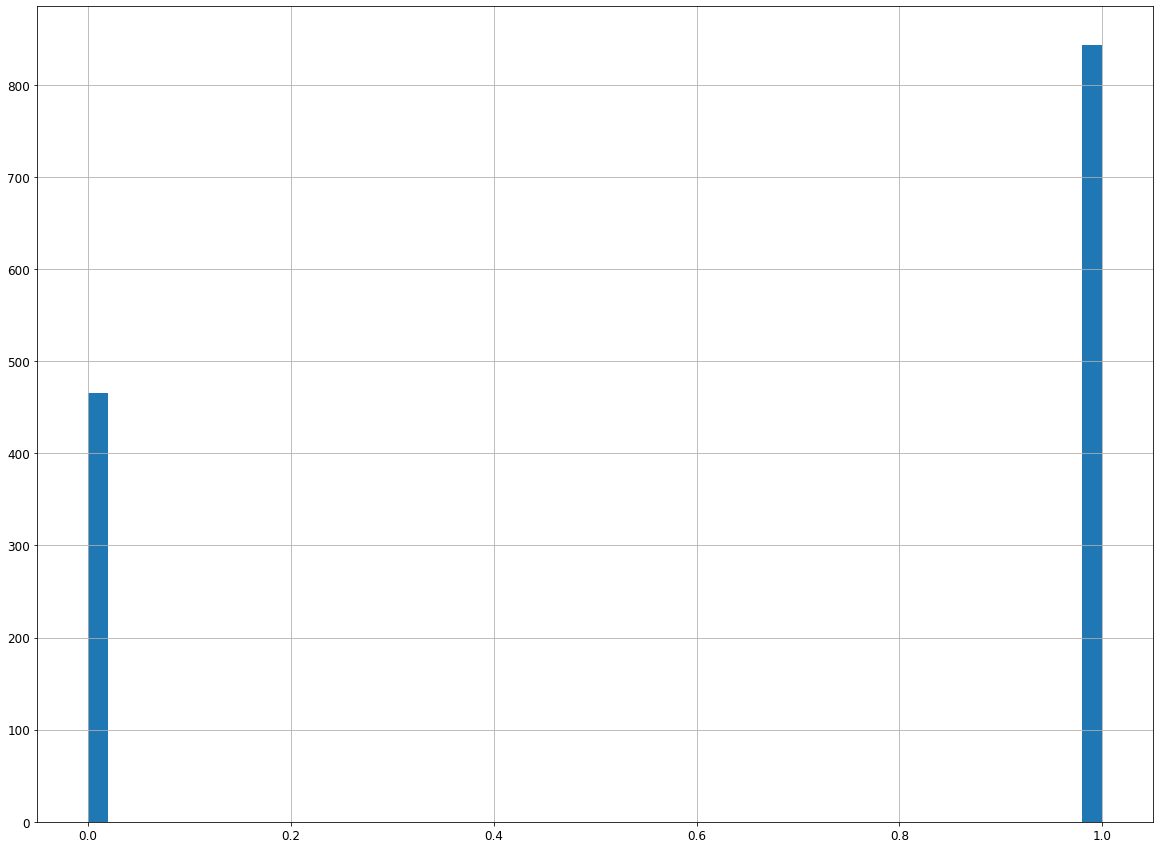

In [74]:
whole_data["NSex"].hist(bins=50, figsize=(20, 15))

In [77]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(whole_data, whole_data["NSex"]):
    strat_train_set = whole_data.loc[train_index]
    strat_test_set = whole_data.loc[test_index]

In [78]:
strat_train_set

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NSex
209,1,1,"Blank, Mr. Henry",40.00,0,0,112277,31.0000,A31,C,1
1213,0,2,"Nesson, Mr. Israel",26.00,0,0,244368,13.0000,F2,S,1
409,0,3,"Lefebre, Miss. Ida",NaN,3,1,4133,25.4667,NaN,S,0
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",36.00,0,1,PC 17755,512.3292,B51 B53 B55,C,1
854,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",44.00,1,0,244252,26.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
78,1,2,"Caldwell, Master. Alden Gates",0.83,0,2,248738,29.0000,NaN,S,1
1013,1,1,"Schabert, Mrs. Paul (Emma Mock)",35.00,1,0,13236,57.7500,C28,C,0
1294,0,1,"Carrau, Mr. Jose Pedro",17.00,0,0,113059,47.1000,NaN,S,1
456,0,1,"Millet, Mr. Francis Davis",65.00,0,0,13509,26.5500,E38,S,1


In [79]:
comper_props_NSex = pd.DataFrame({
    "overAll": att_propotions("NSex", whole_data),
    "OurSplit": att_propotions("NSex", titanic_test_copy),
    "stratified": att_propotions("NSex", strat_test_set),
    "Random": att_propotions("NSex", test_set),
}).sort_index()
comper_props_NSex

,overAll,OurSplit,stratified,Random
0,0.355997,0.363636,0.354962,0.370229
1,0.644003,0.636364,0.645038,0.629771


In [80]:
comper_props_Parch = pd.DataFrame({
    "overAll": att_propotions("Parch", whole_data),
    "OurSplit": att_propotions("Parch", titanic_test_copy),
    "stratified": att_propotions("NSex", strat_test_set),
    "Random": att_propotions("Parch", test_set),
}).sort_index()
comper_props_Parch

,overAll,OurSplit,stratified,Random
0,0.765470,0.775120,0.354962,0.744275
1,0.129870,0.124402,0.645038,0.122137
2,0.086325,0.078947,NaN,0.106870
3,0.006112,0.007177,NaN,0.015267
4,0.004584,0.004785,NaN,0.007634
5,0.004584,0.002392,NaN,0.003817
6,0.001528,0.002392,NaN,NaN
9,0.001528,0.004785,NaN,NaN


In [83]:
comper_props_Survived = pd.DataFrame({
    "overAll": att_propotions("Survived", titanic_test_copy),
    "OurSplit": att_propotions("Survived", titanic_test_copy),
    "stratified": att_propotions("Survived", strat_test_set),
    "Random": att_propotions("Survived", test_set),
}).sort_index()
comper_props_Survived

,overAll,OurSplit,stratified,Random
0,0.636364,0.636364,0.622137,0.60687
1,0.363636,0.363636,0.377863,0.39313


In [84]:
titanic = titanic_train_copy.copy()

In [85]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,NSex
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
NSex,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='NSex', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='NSex', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
    

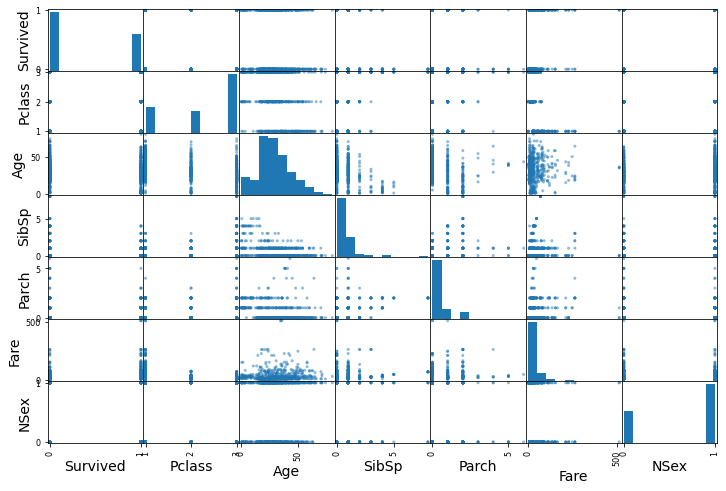

In [86]:
from pandas.plotting import scatter_matrix

scatter_matrix(titanic, figsize=(12, 8))

# Prepare the Data for Machine Learning Algorithms